In [27]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os

In [28]:
folder_path = r"C:\Users\sandr\Documents\DINAMARCA\MASTER\Summer2024\trabajo\Final"
files = os.listdir(folder_path)

csv_files = [file for file in files if file.endswith('.csv')]


csv_files

['ReferenceWithFaceFusion50.csv',
 'ReferenceWithFaceMorpher50.csv',
 'ReferenceWithOpenCV50.csv',
 'ReferenceWithProbe50.csv',
 'ReferenceWithProbeLight50.csv',
 'ReferenceWithReference50.csv',
 'ReferenceWithUBO50.csv']

In [29]:

csv_names = ['FaceFusion', 'FaceMorpher', 'OpenCV', 'Probe', 'ProbeLight', 'Reference', 'UBO']
csv_variables = {}

files = os.listdir(folder_path)

csv_files = [file for file in files if file.endswith('.csv')]

for name, file in zip(csv_names, csv_files):
    file_path = os.path.join(folder_path, file)
    csv_variables[name] = pd.read_csv(file_path)
    #csv_variables[name] = csv_variables[name][csv_variables[name]['distance'] < 0.3]


opencv = csv_variables.get('OpenCV', None)
probe = csv_variables.get('Probe', None)
probeLight = csv_variables.get('ProbeLight', None)
reference = csv_variables.get('Reference', None)
facefusion = csv_variables.get('FaceFusion', None)
facemorpher = csv_variables.get('FaceMorpher', None)
ubo = csv_variables.get('UBO', None)

In [30]:
for name, df in csv_variables.items():
    print(f'Columns in {name}: {df.columns.tolist()}')

Columns in FaceFusion: ['identity', 'distance', 'threshold', 'Model', 'Tested Image', 'origin', 'Is Same Image']
Columns in FaceMorpher: ['identity', 'distance', 'threshold', 'Model', 'Tested Image', 'origin', 'Is Same Image']
Columns in OpenCV: ['identity', 'distance', 'threshold', 'Model', 'Tested Image', 'origin', 'Is Same Image']
Columns in Probe: ['identity', 'distance', 'threshold', 'Model', 'Tested Image', 'origin', 'Is Same Image']
Columns in ProbeLight: ['identity', 'distance', 'threshold', 'Model', 'Tested Image', 'origin', 'Is Same Image']
Columns in Reference: ['identity', 'distance', 'threshold', 'Model', 'Tested Image', 'origin', 'Is Same Image']
Columns in UBO: ['identity', 'distance', 'threshold', 'Model', 'Tested Image', 'origin', 'Is Same Image']


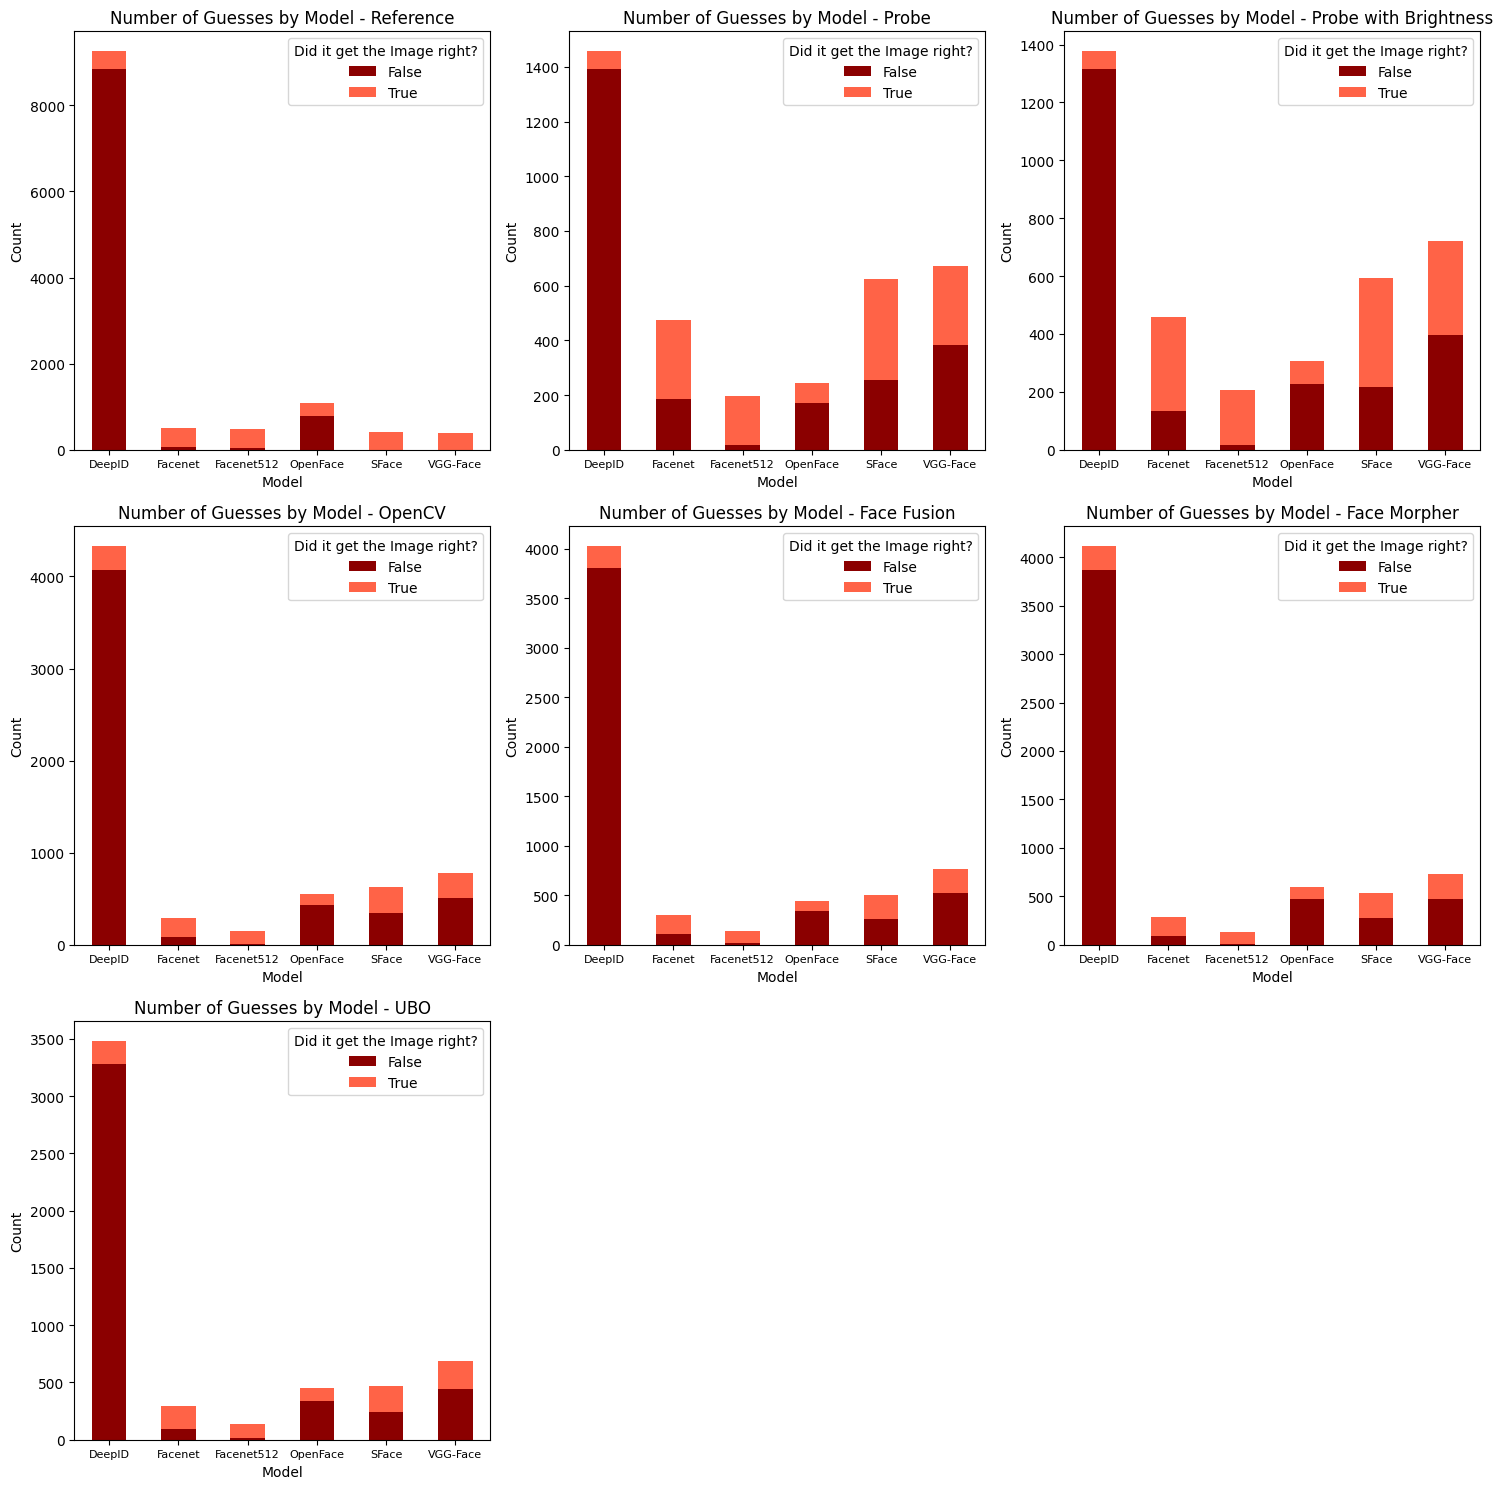

In [31]:

import pandas as pd
import matplotlib.pyplot as plt

#List of dataframes
dataframes = [reference, probe, probeLight, opencv, facefusion, facemorpher, ubo]
dataframe_names = ['Reference', 'Probe', 'Probe with Brightness', 'OpenCV', 'Face Fusion', 'Face Morpher', 'UBO']

#colors for True and False
colors = ['#8B0000', '#FF6347']  


ncols = 3
nrows = (len(dataframes) + ncols - 1) // ncols  

#Create a figure
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

#Flatten the array 
axes = axes.flatten()


for ax, df, name in zip(axes, dataframes, dataframe_names):
    #Group by 'Model' and 'Is Same Image'
    grouped_df = df.groupby(['Model', 'Is Same Image']).size().reset_index(name='Count')

    #Create a pivot table 
    pivot_df = grouped_df.pivot(index='Model', columns='Is Same Image', values='Count')

    #subplot
    pivot_df.plot(kind='bar', stacked=True, ax=ax, color=colors)
    ax.set_title(f'Number of Guesses by Model - {name}')
    ax.set_xlabel('Model')
    ax.set_ylabel('Count')
    ax.legend(title='Did it get the Image right?', labels=['False', 'True'])
    ax.tick_params(axis='x', labelsize=8, rotation=0)


for i in range(len(dataframes), len(axes)):
    axes[i].axis('off')


plt.tight_layout()
plt.show()


In [32]:
for i in range(len(dataframes)):

    filtered_df = dataframes[i][dataframes[i]['Is Same Image'] == True]
    #Group by 'Model' and 'Is Same Image'
    grouped_df = filtered_df.groupby(['Model']).size().reset_index(name='Count')
    lista = [450, 450, 450, 150*2, 150*2, 150*2, 150*2]
    
    grouped_df["CountDiv"] = (grouped_df["Count"]/lista[i])*100
    print(grouped_df)
    

        Model  Count   CountDiv
0      DeepID    402  89.333333
1     Facenet    440  97.777778
2  Facenet512    438  97.333333
3    OpenFace    322  71.555556
4       SFace    412  91.555556
5    VGG-Face    386  85.777778
        Model  Count   CountDiv
0      DeepID     66  14.666667
1     Facenet    289  64.222222
2  Facenet512    179  39.777778
3    OpenFace     74  16.444444
4       SFace    367  81.555556
5    VGG-Face    288  64.000000
        Model  Count   CountDiv
0      DeepID     62  13.777778
1     Facenet    323  71.777778
2  Facenet512    189  42.000000
3    OpenFace     79  17.555556
4       SFace    378  84.000000
5    VGG-Face    326  72.444444
        Model  Count   CountDiv
0      DeepID    257  85.666667
1     Facenet    205  68.333333
2  Facenet512    136  45.333333
3    OpenFace    122  40.666667
4       SFace    280  93.333333
5    VGG-Face    274  91.333333
        Model  Count   CountDiv
0      DeepID    224  74.666667
1     Facenet    196  65.333333
2  Facen

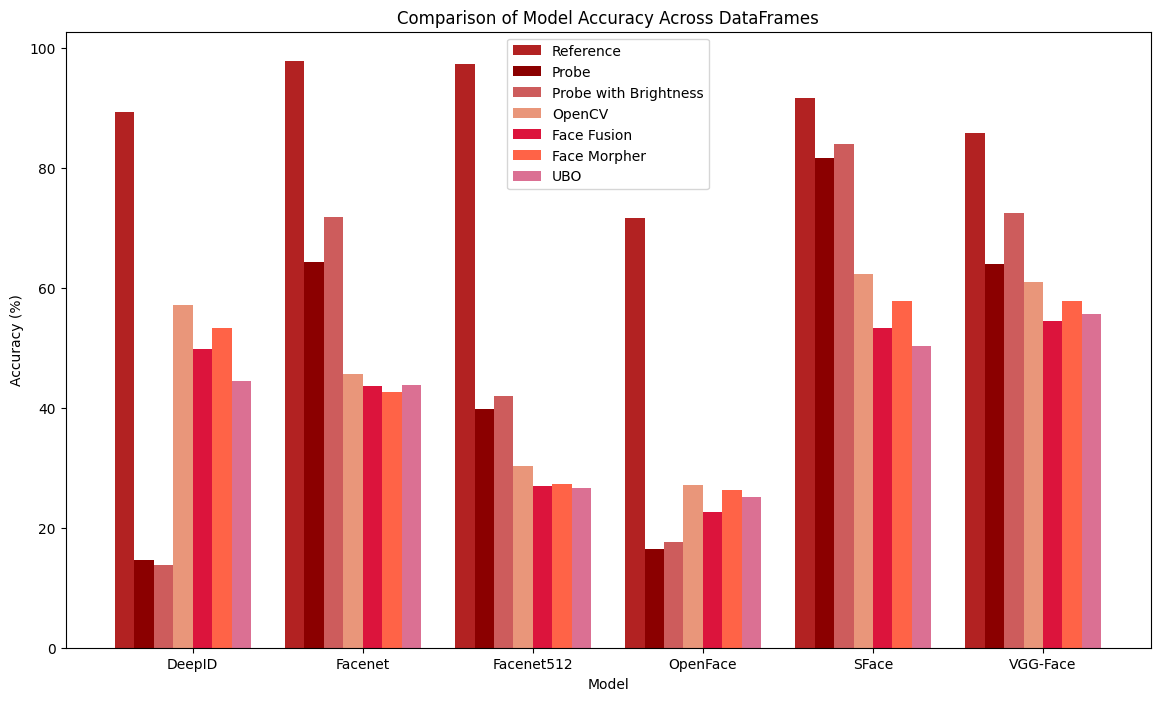

In [33]:
red_colors = [
    "#B22222",  
    "#8B0000",  
    "#CD5C5C",  
    "#E9967A", 
    "#DC143C",  
    "#FF6347",  
    "#DB7093",  
    "#FF4500",  
    "#FF0000",  
    "#D70000",  
]


lista = [450, 450, 450, 450, 450, 450, 450]

fig, ax = plt.subplots(figsize=(14, 8))

unique_models = sorted(set(model for df in dataframes for model in df['Model'].unique()))


num_dataframes = len(dataframes)
bar_width = 0.8 / num_dataframes 

#Initialize x locations
indices = np.arange(len(unique_models))

for i, df in enumerate(dataframes):
    filtered_df = df[df['Is Same Image'] == True]
    

    grouped_df = filtered_df.groupby(['Model']).size().reset_index(name='Count')
    

    grouped_df["Accuracy (%)"] = (grouped_df["Count"] / lista[i]) * 100

    grouped_df = grouped_df.set_index('Model').reindex(unique_models, fill_value=0).reset_index()
    
    #Plott
    offsets = indices - (num_dataframes / 2 - i) * bar_width
    names = ['Reference', 'Probe', 'Probe with Brightness', 'OpenCV', 'Face Fusion', 'Face Morpher', 'UBO']
    ax.bar(offsets, grouped_df['Accuracy (%)'], width=bar_width, color=red_colors[i % len(red_colors)], label=f'{names[i]}')

#Adding legends, labels, and title
ax.set_title('Comparison of Model Accuracy Across DataFrames')
ax.set_xticks(indices)
ax.set_xticklabels(unique_models)
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy (%)')
ax.legend()

plt.show()


### Good plot

           distance     threshold
count  1.212800e+04  12128.000000
mean   2.803633e-02      0.090669
std    4.856437e-02      0.172369
min   -4.440892e-16      0.015000
25%    8.064104e-03      0.015000
50%    1.129378e-02      0.015000
75%    1.409620e-02      0.015000
max    2.975405e-01      0.680000
           distance     threshold
count  1.579400e+04  15794.000000
mean   7.314939e-02      0.140603
std    1.463516e-01      0.221356
min   -4.440892e-16      0.015000
25%    8.561516e-03      0.015000
50%    1.202856e-02      0.015000
75%    5.538309e-02      0.100000
max    6.798644e-01      0.680000
           distance     threshold
count  1.945600e+04  19456.000000
mean   1.026050e-01      0.172695
std    1.776421e-01      0.242452
min   -4.440892e-16      0.015000
25%    9.074733e-03      0.015000
50%    1.268483e-02      0.015000
75%    9.237023e-02      0.300000
max    6.798644e-01      0.680000
           distance     threshold
count  2.617900e+04  26179.000000
mean   1.12335

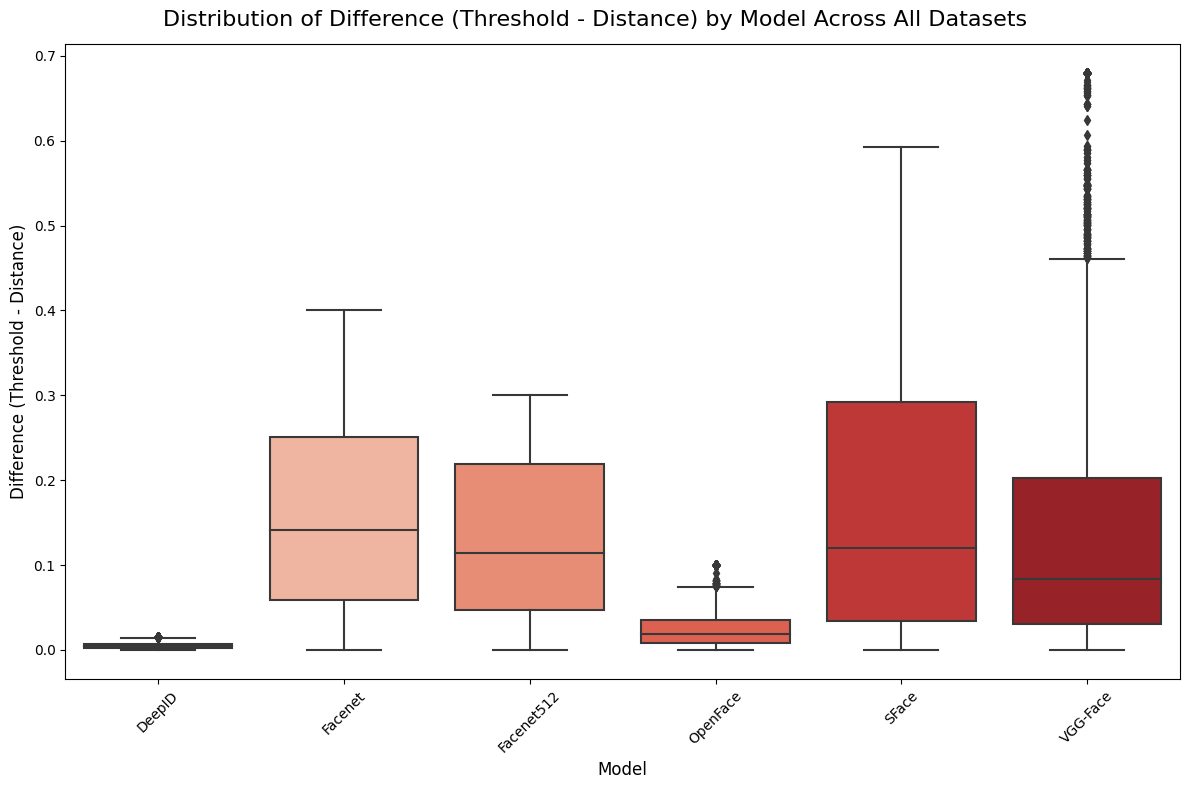

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


counter = 0

all_data = pd.DataFrame()
for dataset in dataframes:
    
    dataset['Source'] = names[i]
    all_data = pd.concat([all_data, dataset], ignore_index=True)
    print(all_data.describe())
    counter += 1


#all_data = all_data[all_data['Is Same Image'] == False]
all_data['difference'] = all_data['threshold'] - all_data['distance']


all_data.sort_values('Model', inplace=True)


fig, ax = plt.subplots(figsize=(12, 8))
fig.suptitle('Distribution of Difference (Threshold - Distance) by Model Across All Datasets', fontsize=16)

sns.boxplot(x='Model', y='difference', data=all_data, ax=ax, palette="Reds")


ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Difference (Threshold - Distance)', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout() 
plt.show()


In [41]:
confused_images = all_data[all_data['Is Same Image']== False]


confusion_counts = confused_images['Tested Image'].value_counts()

confusion_counts.describe()

count    150.000000
mean     230.200000
std       93.892056
min       11.000000
25%      164.750000
50%      243.000000
75%      301.750000
max      443.000000
Name: count, dtype: float64